In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(font='SimHei')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #正常显示负号

In [48]:
data = pd.read_csv("HR_comma_sep.csv");data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


<Axes: ylabel='count'>

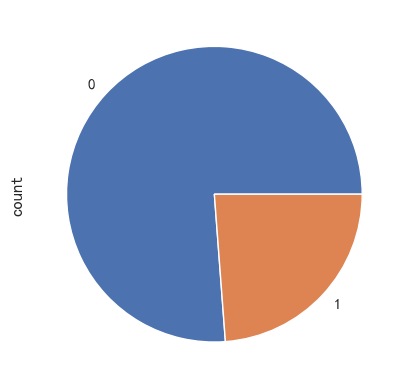

In [49]:
data.left.value_counts().plot(kind='pie')

<Axes: xlabel='sales'>

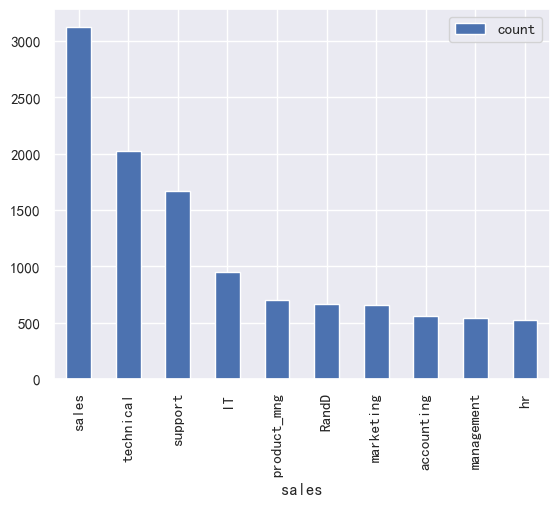

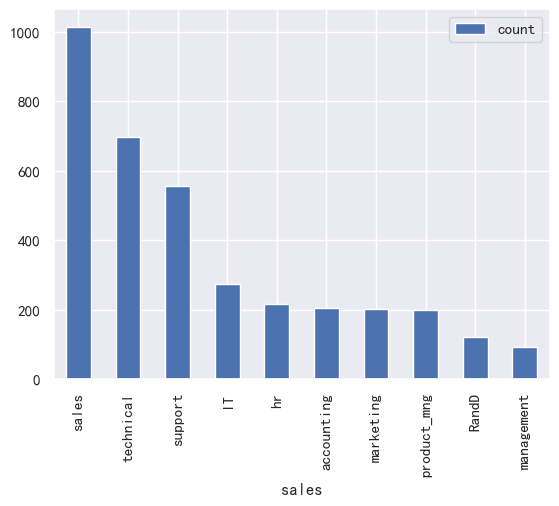

In [50]:
sales_count = data.groupby(['left']).sales.value_counts()
sales_count = sales_count.reset_index()
sales_count[sales_count.left == 0].plot(x='sales', y='count', kind='bar')
sales_count[sales_count.left == 1].plot(x='sales', y='count', kind='bar')


In [51]:
encoder = LabelEncoder()
data['salary'] = encoder.fit_transform(data['salary'])
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,1
14995,0.37,0.48,2,160,3,0,1,0,support,1
14996,0.37,0.53,2,143,3,0,1,0,support,1
14997,0.11,0.96,6,280,4,0,1,0,support,1


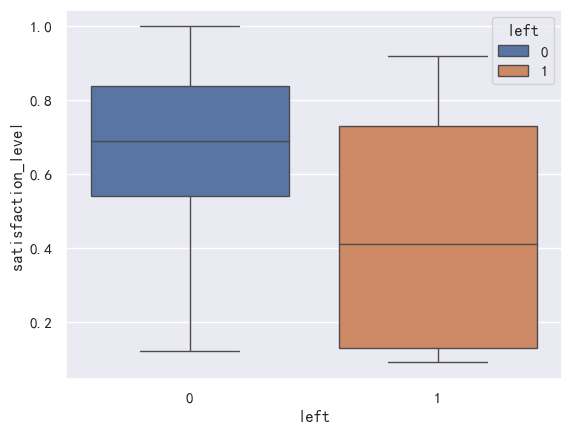

In [52]:
sns.boxplot(x='left', y='satisfaction_level', data=data, hue='left')
plt.show()


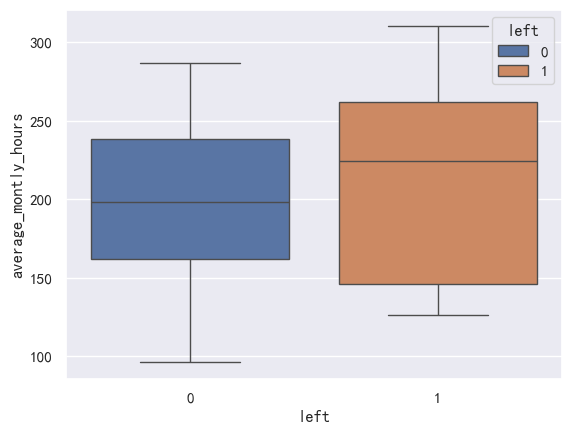

In [53]:
sns.boxplot(x='left', y='average_montly_hours', data=data, hue='left')
plt.show()

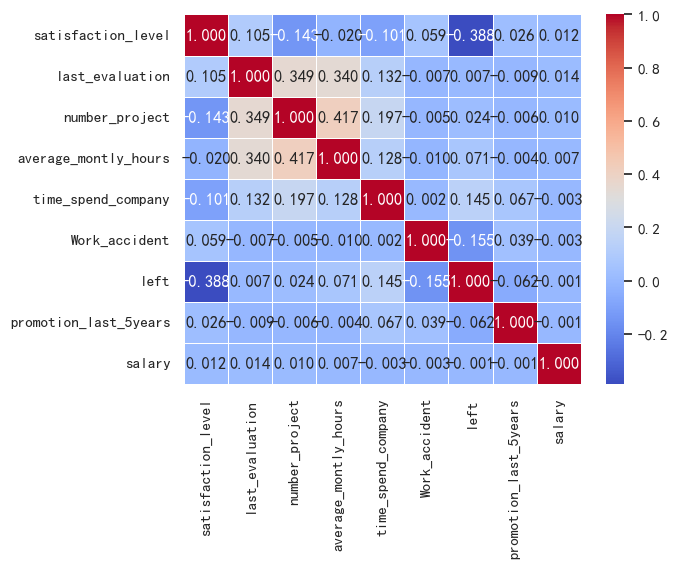

In [68]:
data.drop('sales', axis=1).corr(method='pearson')
sns.heatmap(data.drop(['sales'], axis=1).corr(), annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.show()

In [85]:
X = data.drop(['left','sales'], axis=1)
y = data.left
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [86]:
y_pred = clf.predict(X_test)

# 评估指标
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9673333333333334
Confusion Matrix:
 [[2256   38]
 [  60  646]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2294
           1       0.94      0.92      0.93       706

    accuracy                           0.97      3000
   macro avg       0.96      0.95      0.95      3000
weighted avg       0.97      0.97      0.97      3000



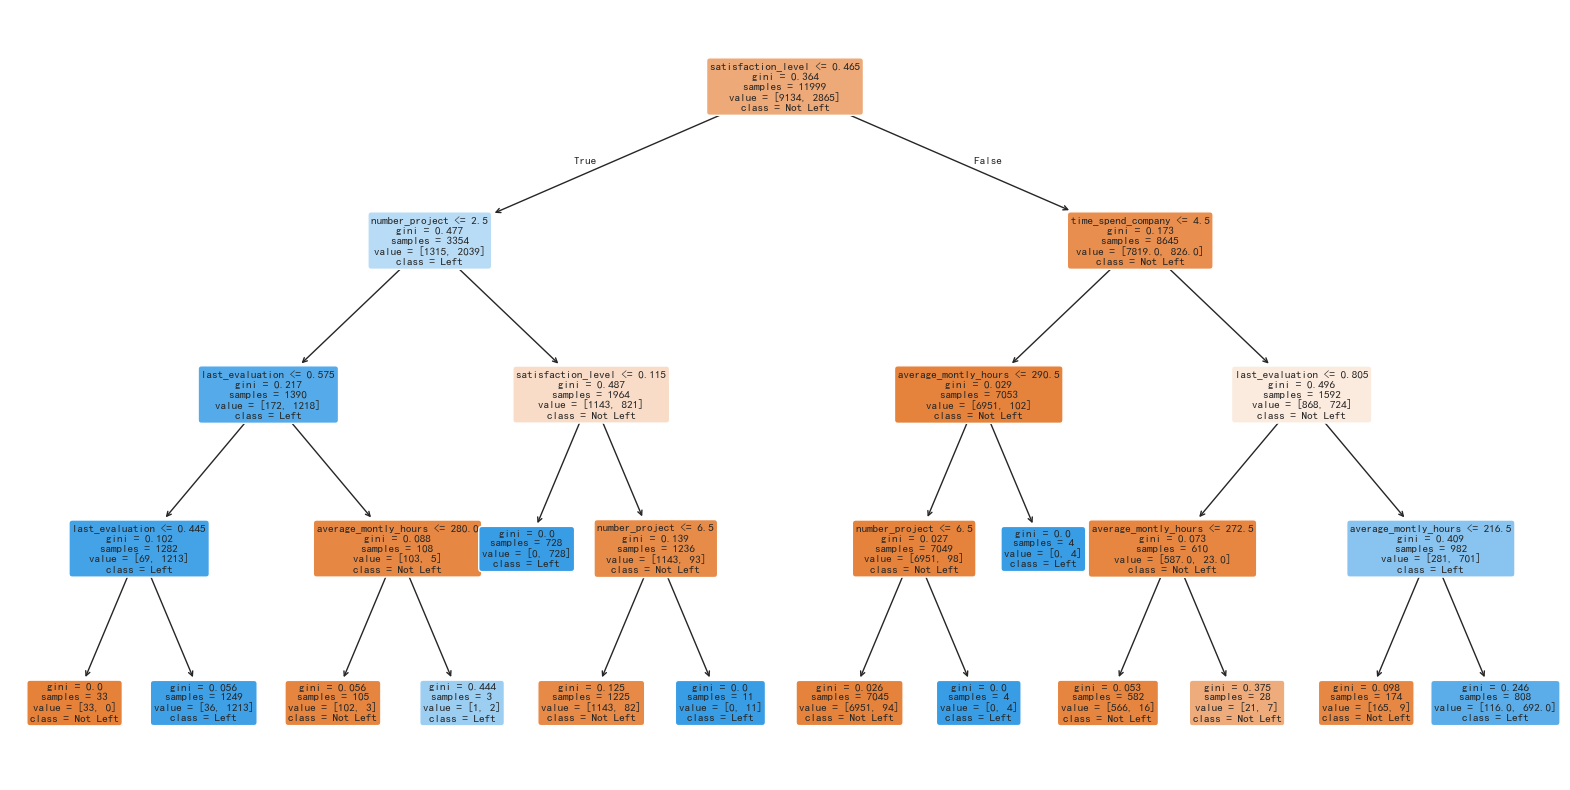

In [87]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Not Left', 'Left'], filled=True,rounded=True, fontsize=8)
plt.show()

In [88]:
imp = pd.DataFrame([*zip(X_train.columns, clf.feature_importances_)], columns=['vars', 'importance'])
imp.sort_values('importance', ascending=False, inplace=True)
imp = imp[imp['importance'] != 0]
imp

,vars,importance
0,satisfaction_level,0.556386
1,last_evaluation,0.153437
4,time_spend_company,0.136524
2,number_project,0.099919
3,average_montly_hours,0.053734
